In [4]:
#Import main lib

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [5]:
df = pd.read_csv('/content/vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [6]:
df.isnull().sum()

,0
Rank,0
Name,0
Platform,0
Year,271
Genre,0
Publisher,58
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


In [7]:
df = df.dropna()

In [8]:
df.nunique()

,0
Rank,16291
Name,11325
Platform,31
Year,39
Genre,12
Publisher,576
NA_Sales,408
EU_Sales,305
JP_Sales,244
Other_Sales,157


In [9]:

df['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [10]:
df["Genre"].value_counts()

,count
Genre,
Action,3251
Sports,2304
Misc,1686
Role-Playing,1470
Shooter,1282
Adventure,1274
Racing,1225
Platform,875
Simulation,848


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rank,16291.0,8290.190228,4792.654450,1.00,4132.50,8292.00,12439.50,16600.00
Year,16291.0,2006.405561,5.832412,1980.00,2003.00,2007.00,2010.00,2020.00
NA_Sales,16291.0,0.265647,0.822432,0.00,0.00,0.08,0.24,41.49
EU_Sales,16291.0,0.147731,0.509303,0.00,0.00,0.02,0.11,29.02
JP_Sales,16291.0,0.078833,0.311879,0.00,0.00,0.00,0.04,10.22
Other_Sales,16291.0,0.048426,0.190083,0.00,0.00,0.01,0.04,10.57
Global_Sales,16291.0,0.540910,1.567345,0.01,0.06,0.17,0.48,82.74


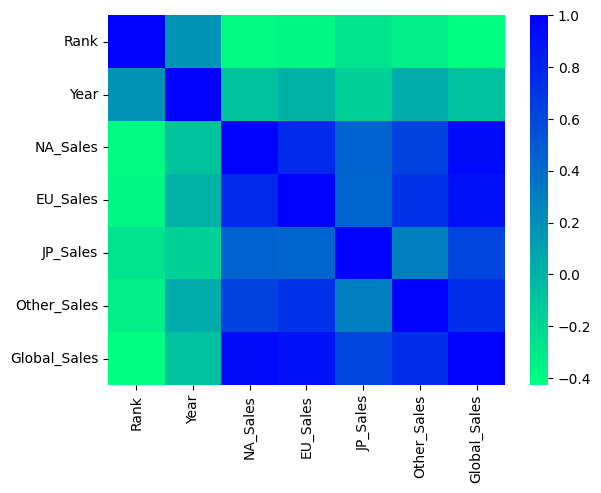

In [14]:
# choose only numerical column
numeric_df = df.select_dtypes(include=['float64', 'int64'])

#create correlation matrix
corr_matrix = numeric_df.corr()

sns.heatmap(corr_matrix, cmap='winter_r')
plt.show()

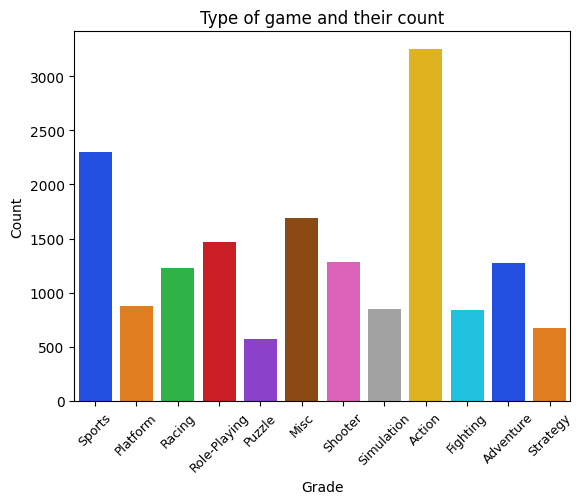

In [15]:
sns.countplot(x='Genre', data=df, palette='bright')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.xticks(fontsize=9, rotation=45)
plt.title('Type of game and their count')
plt.show()

In [16]:
year_df = df.groupby('Year').sum()
year_df = year_df[['Global_Sales']]
year_df.tail()

,Global_Sales
Year,
2014.0,337.03
2015.0,264.44
2016.0,70.90
2017.0,0.05
2020.0,0.29


In [17]:
customer = df.groupby('Year').sum().sort_values('Global_Sales', ascending=False)
customer.drop(["Rank","NA_Sales","EU_Sales","JP_Sales","Other_Sales"],axis=1,inplace=True)
customer.head(5)

,Name,Platform,Genre,Publisher,Global_Sales
Year,,,,,
2008.0,Mario Kart WiiSuper Smash Bros. BrawlGrand The...,WiiWiiX360PS3DSX360X360PS3PS3PSPPS3DSX360WiiX3...,RacingFightingActionActionRole-PlayingShooterS...,NintendoNintendoTake-Two InteractiveTake-Two I...,678.90
2009.0,Wii Sports ResortNew Super Mario Bros. WiiWii ...,WiiWiiWiiX360DSPS3PCWiiPS3X360DSPS3X360PS3X360...,SportsPlatformSportsShooterActionShooterSimula...,NintendoNintendoNintendoActivisionNintendoActi...,667.30
2007.0,Wii FitHalo 3Super Mario GalaxyCall of Duty 4:...,WiiX360WiiX360DSWiiWiiPS3WiiX360DSDSWiiPS2DSPS...,SportsShooterPlatformShooterMiscMiscSportsShoo...,NintendoMicrosoft Game StudiosNintendoActivisi...,609.92
2010.0,Kinect Adventures!Pokemon Black/Pokemon WhiteC...,X360DSX360PS3PS3X360WiiWiiWiiWiiPS3WiiX360X360...,MiscRole-PlayingShooterShooterRacingShooterMis...,Microsoft Game StudiosNintendoActivisionActivi...,600.29
2006.0,Wii SportsNew Super Mario Bros.Wii PlayPokemon...,WiiDSWiiDSWiiX360PS2DSPS2PSPPS2PS2X360PS3PSPPS...,SportsPlatformMiscRole-PlayingActionShooterRol...,NintendoNintendoNintendoNintendoNintendoMicros...,521.04


In [18]:
customer.reset_index(inplace=True)
customer.head(2)

,Year,Name,Platform,Genre,Publisher,Global_Sales
0,2008.0,Mario Kart WiiSuper Smash Bros. BrawlGrand The...,WiiWiiX360PS3DSX360X360PS3PS3PSPPS3DSX360WiiX3...,RacingFightingActionActionRole-PlayingShooterS...,NintendoNintendoTake-Two InteractiveTake-Two I...,678.9
1,2009.0,Wii Sports ResortNew Super Mario Bros. WiiWii ...,WiiWiiWiiX360DSPS3PCWiiPS3X360DSPS3X360PS3X360...,SportsPlatformSportsShooterActionShooterSimula...,NintendoNintendoNintendoActivisionNintendoActi...,667.3


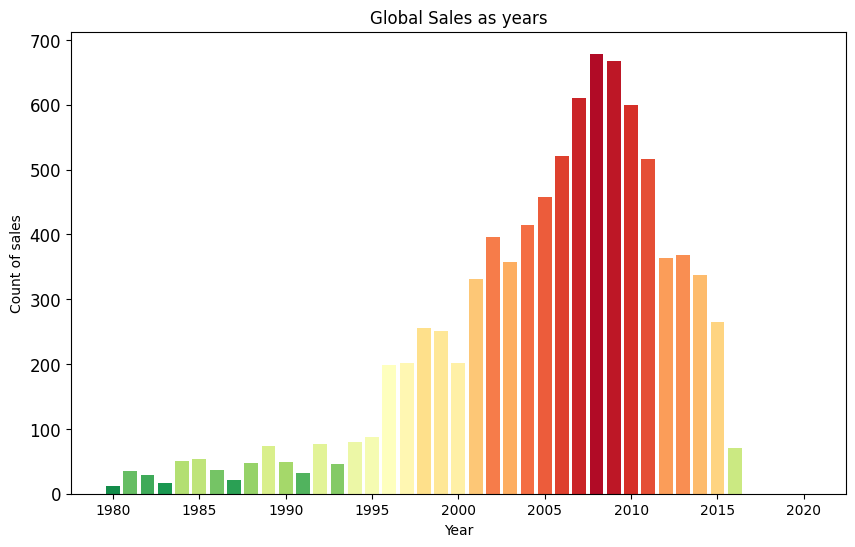

In [19]:
c

In [20]:
category = df.groupby("Genre").sum().sort_values("Global_Sales",ascending=False)
category.drop(["Rank","NA_Sales","EU_Sales","JP_Sales","Other_Sales","Year"],axis=1,inplace=True) # sütun sildik
category.head(5) #

,Name,Platform,Publisher,Global_Sales
Genre,,,,
Action,Grand Theft Auto VGrand Theft Auto: San Andrea...,PS3PS2X360PS2PS2PS4DSX360PS3PS3PSPN64WiiPS3PS3...,Take-Two InteractiveTake-Two InteractiveTake-T...,1722.84
Sports,Wii SportsWii Sports ResortWii FitWii Fit Plus...,WiiWiiWiiWiiPS4WiiPS3WiiPS3PS4X360DSPS3PSPS2PS...,NintendoNintendoNintendoNintendoElectronic Art...,1309.24
Shooter,Duck HuntCall of Duty: Modern Warfare 3Call of...,NESX360X360PS4PS3X360X360PS3PS3X360PS3X360X360...,NintendoActivisionActivisionActivisionActivisi...,1026.20
Role-Playing,Pokemon Red/Pokemon BluePokemon Gold/Pokemon S...,GBGBDSGBADSGB3DS3DSGBAPSX360DSPS2PSDSPS4PS3GBA...,NintendoNintendoNintendoNintendoNintendoNinten...,923.83
Platform,Super Mario Bros.New Super Mario Bros.New Supe...,NESDSWiiSNESGBNESN64Wii3DSSNESDS3DSSNESWiiPSNE...,NintendoNintendoNintendoNintendoNintendoNinten...,829.13


In [21]:
category.reset_index(inplace=True)
category.head(6)

,Genre,Name,Platform,Publisher,Global_Sales
0,Action,Grand Theft Auto VGrand Theft Auto: San Andrea...,PS3PS2X360PS2PS2PS4DSX360PS3PS3PSPN64WiiPS3PS3...,Take-Two InteractiveTake-Two InteractiveTake-T...,1722.84
1,Sports,Wii SportsWii Sports ResortWii FitWii Fit Plus...,WiiWiiWiiWiiPS4WiiPS3WiiPS3PS4X360DSPS3PSPS2PS...,NintendoNintendoNintendoNintendoElectronic Art...,1309.24
2,Shooter,Duck HuntCall of Duty: Modern Warfare 3Call of...,NESX360X360PS4PS3X360X360PS3PS3X360PS3X360X360...,NintendoActivisionActivisionActivisionActivisi...,1026.20
3,Role-Playing,Pokemon Red/Pokemon BluePokemon Gold/Pokemon S...,GBGBDSGBADSGB3DS3DSGBAPSX360DSPS2PSDSPS4PS3GBA...,NintendoNintendoNintendoNintendoNintendoNinten...,923.83
4,Platform,Super Mario Bros.New Super Mario Bros.New Supe...,NESDSWiiSNESGBNESN64Wii3DSSNESDS3DSSNESWiiPSNE...,NintendoNintendoNintendoNintendoNintendoNinten...,829.13
5,Misc,Wii PlayKinect Adventures!Brain Age: Train You...,WiiX360DSWiiWiiX360DSWiiWiiWiiWiiDSPS3GBPS2PS2...,NintendoMicrosoft Game StudiosNintendoUbisoftU...,789.87


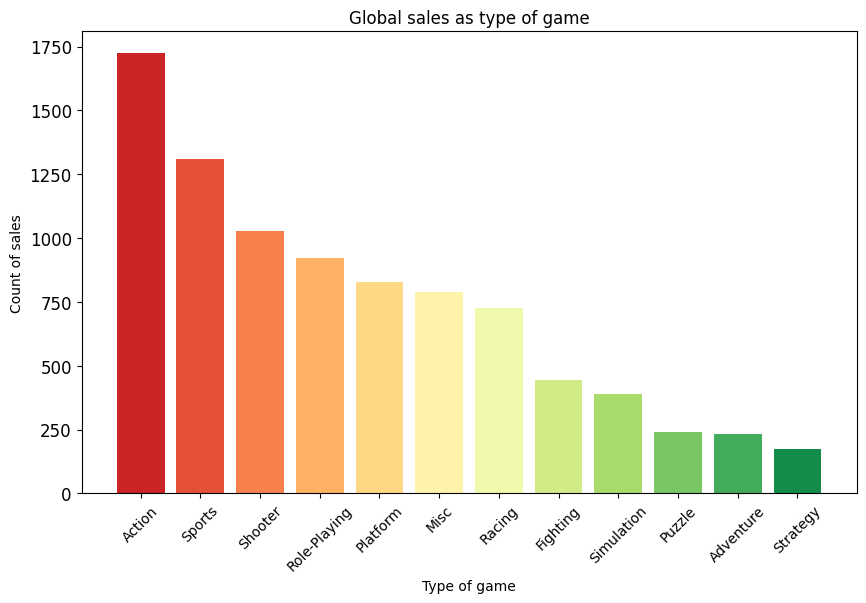

In [22]:
plt.figure(figsize=(10, 6))
colors= sns.color_palette('RdYlGn', len(df['Genre'].unique()))
plt.bar(category['Genre'], category['Global_Sales'], color=colors)
plt.title('Global sales as type of game')
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=12)
plt.xlabel('Type of game')
plt.ylabel('Count of sales')
plt.show()

In [23]:
eu_sales = df['EU_Sales'].sum()
jp_sales = df['JP_Sales'].sum().round(2)
na_sales = df['NA_Sales'].sum().round(2)

print('Total EU sales:',eu_sales )
print('Total JP sales:',jp_sales )
print('Total NA sales:',na_sales )


Total EU sales: 2406.69
Total JP sales: 1284.27
Total NA sales: 4327.65


In [24]:
total = {
    'Sales': [eu_sales, jp_sales, na_sales ],
    'Zone' : ['EU', 'JP', 'NA']
}

In [26]:
total1 = pd.DataFrame(total)
total1

,Sales,Zone
0,2406.69,EU
1,1284.27,JP
2,4327.65,NA


In [30]:
#Change object to category
total1.Zone = pd.Categorical(total1.Zone)

In [31]:
total1.dtypes

,0
Sales,float64
Zone,category


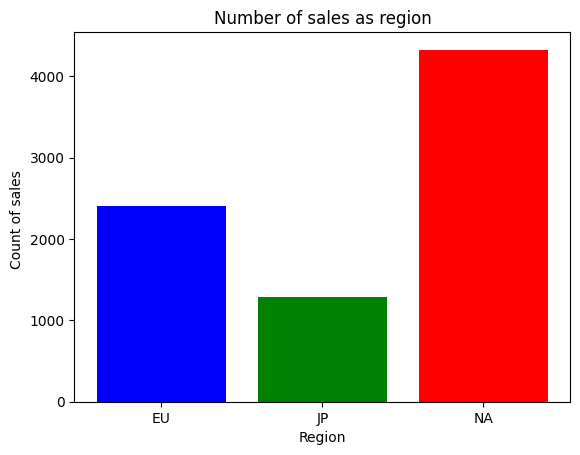

In [33]:
plt.bar(total1["Zone"], total["Sales"],color=["Blue","Green","Red"])
plt.title("Number of sales as region")
plt.xlabel("Region")
plt.ylabel("Count of sales ")
plt.show()

<Axes: xlabel='EU_Sales', ylabel='Global_Sales'>

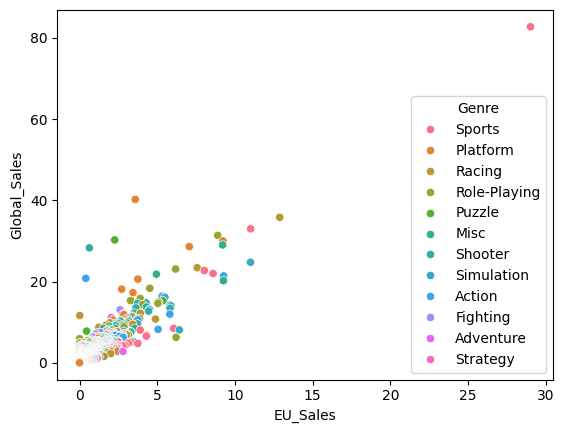

In [34]:
sns.scatterplot(x='EU_Sales', y='Global_Sales', hue='Genre', data=df)

In [35]:
df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

x = df[['Platform', 'Genre', 'Publisher']]
y = df['Global_Sales']

#Label encoder
label_encoders = {}
for col in x.columns:
  label_encoders[col] = LabelEncoder()
  x[col] = label_encoders[col].fit_transform(x[col])

x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.2, random_state=42)

#Decision Tree
model = DecisionTreeRegressor(random_state=42)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)


mse = mean_squared_error(y_test, y_pred)
print("MSE: {:.3f}".format(mse))

ea_ps4_sports = df[(df['Publisher'] == 'Electronic Arts') & (df['Platform'] == 'PS4') & (df['Genre'] == 'Sports')]
mean_value = ea_ps4_sports['Global_Sales'].mean()
print(f'Mean of global sales : {mean_value:.3f}')


example_prediction = model.predict([[label_encoders['Platform'].transform(['PS4'])[0],
                                     label_encoders['Genre'].transform(['Sports'])[0],
                                     label_encoders['Publisher'].transform(['Electronic Arts'])[0]]]
                                   )

example_prediction_value = example_prediction[0]
print("Cost: {:.3f}".format(example_prediction_value))

MSE: 3.988
Mean of global sales : 2.124
Cost: 2.438


In [40]:
ea_ps4_sports = df[(df['Publisher'] == 'Electronic Arts') & (df['Platform'] == 'PS4') & (df['Genre'] == 'Sports')]
ea_ps4_sports[["Global_Sales"]]

,Global_Sales
77,8.49
124,6.59
221,4.77
418,3.22
493,2.90
836,2.03
1628,1.23
2012,1.04
2342,0.89
2529,0.82


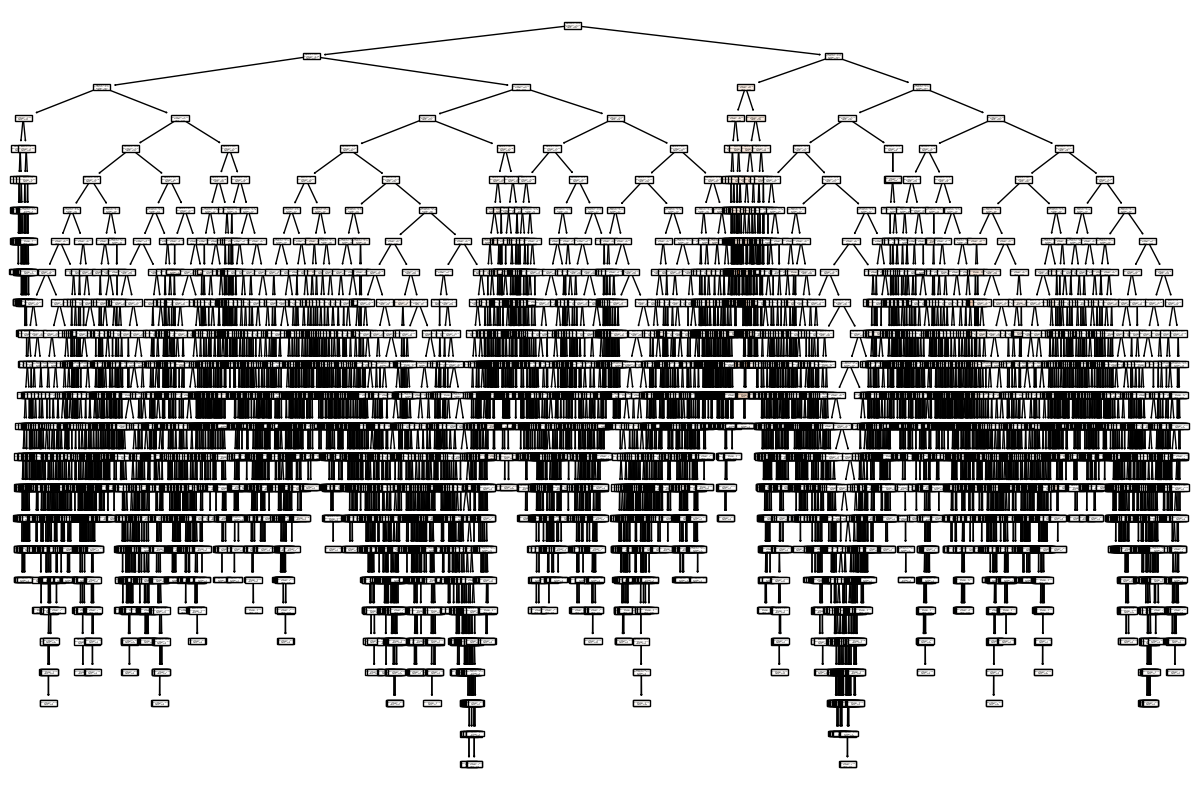

In [41]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
plot_tree(model, feature_names=x.columns.tolist(), filled=True)
plt.show()